In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

### 1. Описание, чтение, визуализация

In [2]:
data_train = pd.read_csv('./train.csv', sep = ',', engine = 'python')
copy_data_train = data_train.copy
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Набор данных  представленный здесь - список пассажиров Титаника. Необходимо
решить категориальную задачу, а именно определить в зависимости от параметров **выжил
пассажир или нет**. В данном наборе данных представлены следующие признаки:
- PassengerId - ID пассажира
- Survived - выжил ди пассажир, или нет (бинарный признак 1-да, 0-нет)
- Pclass - класс, в котором путешествовал пассажир (1/2/3)
- Name - имя пассажира
- Sex - пол
- Age - возраст
- SibSp - количество братьев/сестер/супругов на борту
- Parch - количество родителей/детей на борту
- Ticket - номер билета
- Fare - тариф
- Cabin - номер каюты
- Embarked - порт посадки

In [3]:
categorical_columns = [col for col in data_train.columns if data_train[col].dtype.name == 'object']
numerical_columns = [col for col in data_train.columns if data_train[col].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Сводную информацию о признаках можем получить, вызвав метод describe. 
Для каждого количественного признака приведены средние значения, стандартное
 отклонение, минимальное и макимальное значения, медиана и значения квантилей.

In [4]:
data_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Построим попарные матрицы разброса

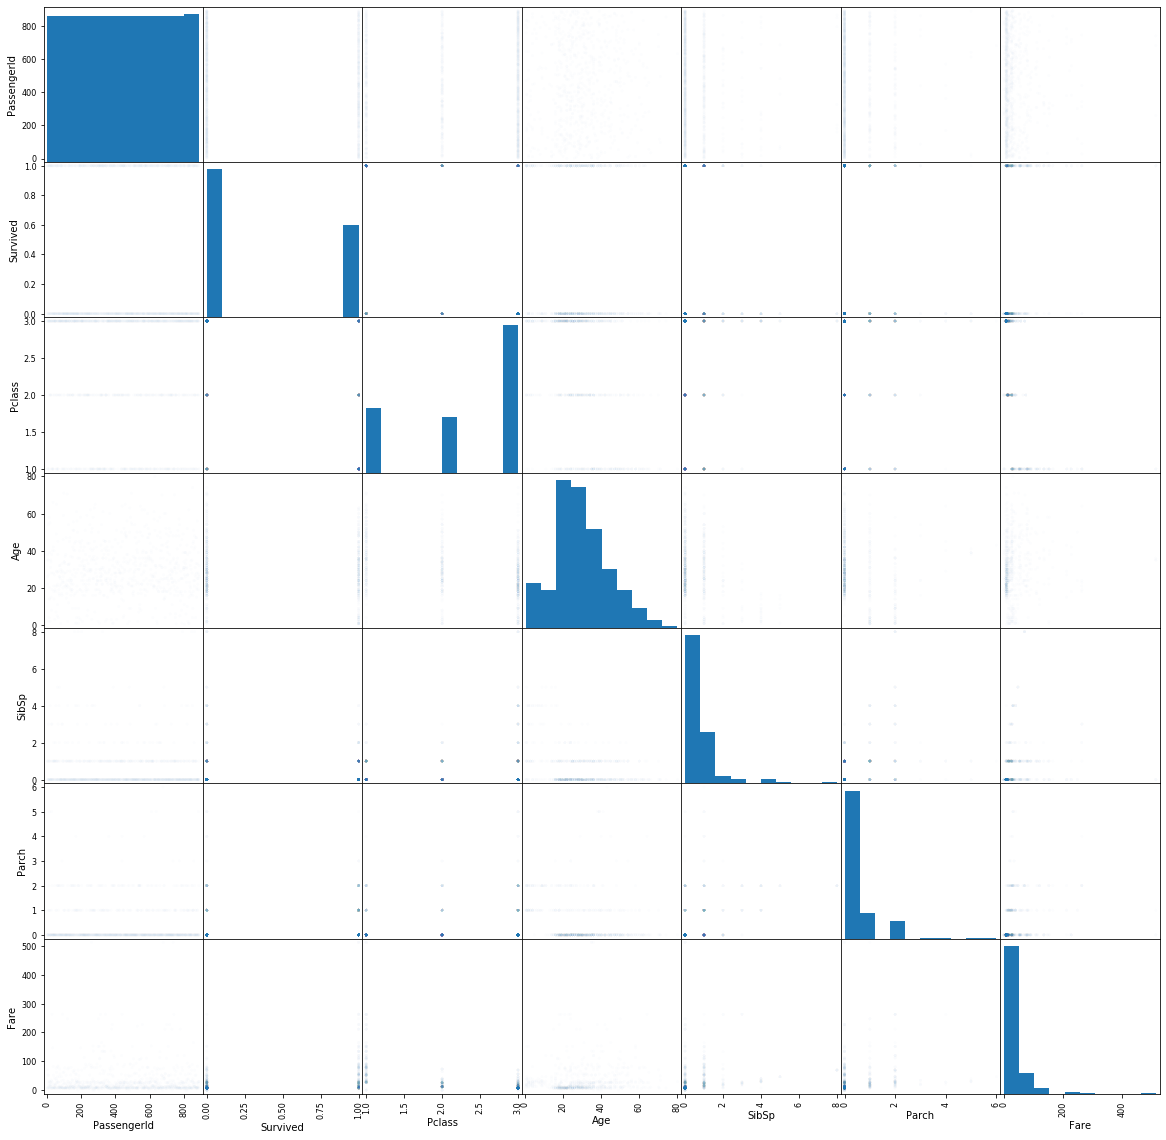

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_train, alpha = .01, figsize = (20, 20))
pass

Можно вычислить матрицу корреляции для количественных признаков.
Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, 
тем больше по абсолютной величине коэффициент корреляции.

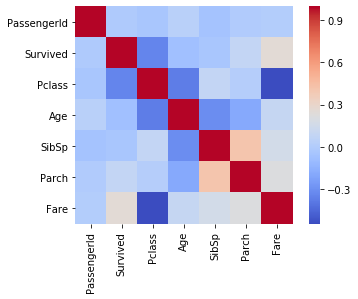

In [6]:
corr_mat = data_train.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, которые больше заданного значения. Считается, что сильная
корреляция наблюдается свыше 0.7

In [7]:
corr_mat.where(np.triu(corr_mat > 0.0, k=1)).stack().sort_values(ascending=False)

SibSp        Parch    0.414838
Survived     Fare     0.257307
Parch        Fare     0.216225
SibSp        Fare     0.159651
Age          Fare     0.096067
Pclass       SibSp    0.083081
Survived     Parch    0.081629
PassengerId  Age      0.036847
Pclass       Parch    0.018443
PassengerId  Fare     0.012658
dtype: float64

Обратим внимание, что максимальный коэффициент корреляции наблюдается у признаков, отвещающих
за количество родственников на борту. Логично предположить, что было достаточно много семей
путешествующих в четвером и более (SibSp - количество братьев/сестер/супругов на борту, 
Parch - количество родителей/детей на борту). 
Остальные признаки даже не средне коррелированы, поэтому исключать какие-либо признаки нет
необходимости. 

Коллинеарными называются признаки, которые сильно коррелируют друг с другом. 
В машинном обучении это приводит к снижению производительности обобщения данных 
из-за высокой дисперсии и меньшей интерпретируемости модели. Сильно коррелированные друг
 с другом переменные дают модели одну и ту же информацию, следовательно,
  для анализа не нужно использовать их все.

### 2. Подготовка данных
#####  обрабока пропущенных значений, категориальных признаков, нормализация признаков
Пропущенные значения в таблице представлены значениями np.nan. 
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [8]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Данных, с которыми мы работаем мало. Разумно заполнить пропущенные значения средним или медианой 
(для количественных признаков) или модой (для номинальных признаков)

In [9]:
data_train.fillna(data_train.median(axis = 0), axis=0 , inplace=True)
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data_describe = data_train.describe(include = [object])
# for c in categorical_columns:
#     data_train[c] = data_train[c].fillna(data_describe[c]['top'])
data_train['Cabin'].fillna(data_train['Cabin'].mode().iloc[0], inplace=True)
data_train['Embarked'].fillna(data_train['Embarked'].mode().iloc[0], inplace=True)
data_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Визуализируем данные повторно:

In [11]:
data_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,691,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с 
категориальными признаками. Поэтому их вначале надо закодировать 
с помощью числовых принаков.
Сначала удалим ненужные нам столбцы - имя и id пассажира, номер его билета, так как эти признаки не 
влияют на выживание пассажира.

In [12]:
data_train = data_train.drop("Name", axis = 1)
data_train = data_train.drop("PassengerId", axis = 1)
data_train = data_train.drop("Ticket", axis = 1)
# сохраняем в отдельную колонку результат выживания
survived_col = data_train['Survived']
data_train = data_train.drop("Survived", axis = 1)
# колонки с категориальными признаками
categorical_columns = [col for col in data_train.columns if data_train[col].dtype.name == 'object']
# колонки с количественными признаками
numerical_columns = [col for col in data_train.columns if data_train[col].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Sex', 'Cabin', 'Embarked']
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Выделим в отдельную таблицу **количественные** признаки:

In [13]:
data_numerical = data_train[numerical_columns]
data_numerical

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
5,3,28.0,0,0,8.4583
6,1,54.0,0,0,51.8625
7,3,2.0,3,1,21.0750
8,3,27.0,0,2,11.1333
9,2,14.0,1,0,30.0708


Получим сводную информацию для измененной исходной таблицы:

In [14]:
data_describe = data_train.describe(include = [object])
for col in categorical_columns:
    data_train[col] = data_train[col].fillna(data_describe[col]['top'])
print(data_train.describe())
print()
print(data_train.describe(include = [object]))

           Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642   29.361582    0.523008    0.381594   32.204208
std      0.836071   13.019697    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   22.000000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   35.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200

         Sex    Cabin Embarked
count    891      891      891
unique     2      147        3
top     male  B96 B98        S
freq     577      691      646


Выделим в категориальных признаках бинарные и небинарные:

In [15]:
binary_columns    = [col for col in categorical_columns if data_describe[col]['unique'] == 2]
nonbinary_columns = [col for col in categorical_columns if data_describe[col]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Sex'] ['Cabin', 'Embarked']


In [16]:
data_train.at[data_train['Sex'] == 'male', 'Sex'] = 0
data_train.at[data_train['Sex'] == 'female', 'Sex'] = 1
data_train['Sex']

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

Выделим в отдельную таблицу **бинарные** признаки

In [17]:
data_binary = data_train[binary_columns]
data_binary

,Sex
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


Векторизуем **небинарные** признаки и выделим в отдельную таблицу:

In [18]:
data_nonbinary = pd.get_dummies(data_train[nonbinary_columns])
data_nonbinary

,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Аналогичные операции по подготовке данных необходимо провести и для тестровых данных

In [19]:
# data_test = pd.read_csv('./test.csv', sep = ',', engine='python')
# copy_data_test = data_test.copy
# data_test.fillna(data_test.median(axis = 0), axis=0 , inplace=True)
# data_test['Cabin'].fillna(data_test['Cabin'].mode().iloc[0], inplace=True)
# data_test = data_test.drop("Name", axis = 1)
# data_test = data_test.drop("PassengerId", axis = 1)
# numerical_columns_test = [col for col in data_test.columns if data_test[col].dtype.name != 'object']
# data_numerical_test = data_test[numerical_columns_test]
# categorical_columns_test = [col for col in data_test.columns if data_test[col].dtype.name == 'object']
# data_describe = data_test.describe(include = [object])
# binary_columns_test = [col for col in categorical_columns_test if data_describe[col]['unique'] == 2]
# nonbinary_columns_test = [col for col in categorical_columns_test if data_describe[col]['unique'] > 2]
# data_test.at[data_test['Sex'] == 'male', 'Sex'] = 0
# data_test.at[data_test['Sex'] == 'female', 'Sex'] = 1
# data_binary_test = data_test[binary_columns_test]
# data_nonbinary_test = pd.get_dummies(data_test[nonbinary_columns_test])
# # было обнаружено не соответсвие стролбцов в train и test, для этого нашли разницу множеств столбцов
# for_test = np.setdiff1d(data_nonbinary.columns, data_nonbinary_test.columns)
# for col in for_test:
#     data_nonbinary_test[col] = 0
# for_train =  np.setdiff1d(data_nonbinary_test.columns, data_nonbinary.columns)
# for col in for_train:
#     data_nonbinary[col] = 0

Теперь воссоздадим таблицу, но уже с подготовленными данными 
data_numerical+data_nonbinary+data_binary+survived_col. 
Перед этим, количественные признаки необходимо стандатизировать.

In [20]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
#data_numerical_test = (data_numerical_test - data_numerical_test.mean(axis = 0))/data_numerical_test.std(axis = 0)
data_train = pd.concat((data_numerical, data_nonbinary, data_binary), axis=1)
#data_test = pd.concat((data_numerical_test, data_nonbinary_test, data_binary_test), axis=1)
data_train.describe(include='all')

,Pclass,Age,SibSp,Parch,Fare,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Sex
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,-4.386066e-17,2.312653e-16,1.594933e-17,3.588600e-17,7.237009e-16,0.001122,0.001122,0.001122,0.001122,0.001122,...,0.003367,0.003367,0.001122,0.002245,0.004489,0.001122,0.188552,0.086420,0.725028,0.352413
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.033501,0.033501,0.033501,0.033501,0.033501,...,0.057961,0.057961,0.033501,0.047351,0.066890,0.033501,0.391372,0.281141,0.446751,0.477990
min,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Проверим наши данные на несбалансированность классов.

In [21]:
survived_col.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Данные оказались сбалансированными по признаку "Survived", так как ни один из классов не 
меньше 10% от общего числа пассажиров.

Обработка данных завершена, решаем задачу.

### 3. Pешение задачи классификации

Тренировочные данные:

In [22]:
X = data_train
y = survived_col
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

623 268


Применим метод ближайших соседей. Начальное количество соседей равно 10.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.17656500802568217


Посмотрим на другие случаи, когда количество соседей 7-1

In [24]:
for i in range(7,0,-1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)

    y_train_predict = knn.predict(X_train)
    err_train = np.mean(y_train != y_train_predict)
    print(i, err_train)

7 0.16693418940609953
6 0.16853932584269662
5 0.16051364365971107
4 0.16693418940609953
3 0.12841091492776885
2 0.1332263242375602
1 0.024077046548956663


Заетим, что для 3 соседей процент ошибки меньше чем для 2 и 5.
Проверим работу метода соседей уже на тестовой выборке.

In [25]:
for i in range(7,0,-1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_test, y_test)

    y_test_predict = knn.predict(X_test)
    err_test = np.mean(y_test != y_test_predict)
    print(i, err_test)

7 0.17537313432835822
6 0.17164179104477612
5 0.16044776119402984
4 0.16417910447761194
3 0.11567164179104478
2 0.13059701492537312
1 0.0


Ошибки для одинакового количества соседей +- одинаковые

Построим график зависимости ошибки от числа соседей для выборок.

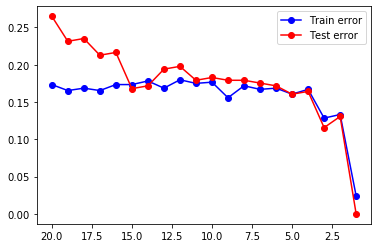

In [26]:
dataDict = {'train':{'data':(X_train, y_train), 'error':[]}, 'test':{'data':(X_test, y_test), 'error':[]}}
for k in range(20,0,-1):
    for key in dataDict:
        X = dataDict[key]['data'][0]
        y = dataDict[key]['data'][1]
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X, y)
        y_predict = knn.predict(X)
        dataDict[key]['error'].append(np.mean(y != y_predict))
plt.plot(range(20,0,-1), dataDict['train']['error'], '-ob', label="Train error")
plt.plot(range(20,0,-1), dataDict['test']['error'], '-or', label="Test error")
plt.gca().invert_xaxis()
plt.legend()
plt.show()

Оптимальным количеством соседей будет 3(пика вниз). Ошибка на тренировочной выборке будет составлять 12.8%, 
а на тестовой 11.5%

Проведем анализ матрицы неточностей для 3х соседей:

In [27]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_test, y_test)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_test != y_test_predict)
print(err_train)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

0.11567164179104478
[[143  14]
 [ 17  94]]


Таким образом, модель верно предсказала 143 погибших и 94 выживших. 14 человек погибли, 
но модель посчитала их выжившими, а 17 человек выжили, но модель посчитала их умершими.

### 4. Дополнительные задания (другие классификаторы)
#### Random forest

In [28]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))


0.01765650080256822 0.23134328358208955
[[132  25]
 [ 37  74]]


#### SVC

In [29]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.2102728731942215 0.2126865671641791
[[147  10]
 [ 47  64]]


Подбор параметров

In [30]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.1701444622792937 10000.0


In [31]:
svc = SVC(C = best_C, gamma='auto').fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.10593900481540931 0.2126865671641791
[[146  11]
 [ 46  65]]


Таким образом, разлиные классификаторы на тестовой выборке дают следующие значения:
- KNN   0.11567164179104478
- RF    0.23134328358208955
- SVC   0.2126865671641791

### 5. Применение PCA
 Число главных компонент равно 2.

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_train)
print("Главные компоненты (по строкам):")
print(pca.components_)
print("Дисперсии по главным компонентам,Cобственные значения вдоль каждой компоненты:")
print(pca.explained_variance_)
print("Среднеквадратические отклонения:")
print(np.sqrt(pca.explained_variance_))
print("Соответствующие сингулярные значения:")
print(pca.singular_values_)

Главные компоненты (по строкам):
[[-6.66900268e-01  3.84301877e-01 -4.79416968e-02  4.31928245e-02
   5.82322906e-01  9.95804031e-04  8.48378713e-04  1.22073103e-03
   6.58499185e-04  1.33057320e-03  1.64427727e-03  8.92579943e-04
   1.32993733e-03  1.00274561e-03  8.33772595e-04  6.91734345e-04
   6.70970125e-04  1.59969285e-03  7.27878243e-04  1.29485197e-03
   4.42594356e-03  4.68619657e-04  2.17000467e-03  1.32032353e-03
   1.60454481e-03  3.00412184e-03  2.98721127e-03  2.35646711e-03
   1.72227127e-03  2.04774480e-03  1.32437058e-03  9.75239317e-04
   9.08633388e-04  1.08748890e-03  1.72896395e-03  5.57261445e-04
   2.20307096e-03  3.90936442e-03  8.51930102e-04  5.07801152e-03
   4.72913643e-03  5.16276415e-03  1.63435805e-03  8.76470850e-04
   1.22335614e-03  2.40115240e-03  1.63366998e-03  9.14697775e-04
   2.21262924e-03  1.46512602e-03  1.06042509e-03  6.89365622e-04
  -2.20511701e-01  1.28538350e-03  1.24949028e-03  1.13285488e-03
   6.91362949e-04  1.19789316e-03  7.950556

Изобразим на плоскости точками пассажиров:  Зелеными будут обозначеы выжившие 
пассажиры, а красными - погибшие.

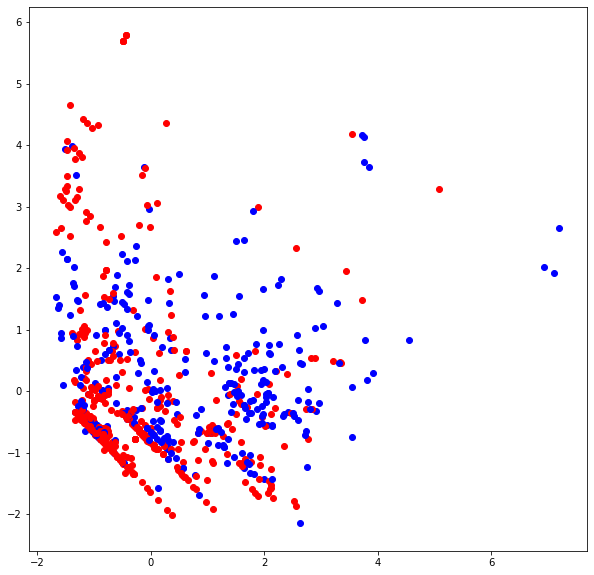

In [33]:
y = survived_col
plt.figure(figsize=(10,10))
for i in range(len(X_pca)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c= 'red' if y[i] == 0 else 'blue')

Можно заметить достаточно явно прослеживаемую зависимость - красные и синие 
точки расположены слоями.

Применим KNN с наилучшим количеством сосдей = 3.

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_train)
X = X_pca
y = survived_col
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

623 268


In [35]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)

0.3258426966292135 0.13805970149253732


Построим график зависимости ошибки на тестовой и обучающей выборки в зависимости от количества используемых компонент.

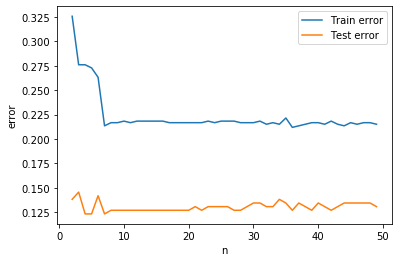

0.21187800963081863 36
0.12313432835820895 4


In [36]:
from sklearn.model_selection import train_test_split
err_train_list = []
err_test_list = []
for n_comp in range(2, 50):
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(data_train)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train)
    knn.fit(X_test, y_test)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    err_train = np.mean(y_train != y_train_predict)
    err_test = np.mean(y_test != y_test_predict)
    
    err_train_list.append(err_train)
    err_test_list.append(err_test)
    
plt.plot(range(2, 50), err_train_list, label="Train error")
plt.plot(range(2, 50), err_test_list, label="Test error")
plt.xlabel('n')
plt.ylabel('error')
plt.legend()
plt.show()
print(min(err_train_list), 2 + err_train_list.index(min(err_train_list)))
print(min(err_test_list), 2 + err_test_list.index(min(err_test_list)))

Можно заметить, что на тренировой выборке ошибка убывает, пока число компонент не превысит 7. Ошибка на тестовой выборке практически постоянна, имеется несущественный рост после 7(для 4, 5, 7 ошибка одинаковая).

### 5. Применение LDA
 Число главных компонент равно 2.

In [37]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
X = data_train
y = survived_col
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)  
    
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)


lda_model.fit(X_train, y_train)
y_pred = lda_model.predict(X_train)
y_test_pred = lda_model.predict(X_test)
print (np.mean(y_train != y_pred))
print (np.mean(y_test != y_test_pred))

623 268
0.1492776886035313
0.22761194029850745


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [ ]:

from sklearn import neighbors
err_train = []
err_test = []
k_range = range(1, 50)
for k in k_range:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    knn_model.fit(X_test, y_test)
    y_pred      = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)
    err_train.append(np.mean(y_train != y_pred))
    err_test.append(np.mean(y_test != y_test_pred))

In [ ]:

plt.plot(k_range, err_train, 'r')
plt.plot(k_range, err_test, 'b')

In [40]:
print (err_train[3], err_test[3])


0.16693418940609953 0.23507462686567165
